In [6]:
import os
os.getcwd()


'/Users/sidsmacbook/nutrition_analysis/notebooks'

In [9]:
import pandas as pd
df = pd.read_csv("../data/UnifiedDataset.csv")
df.head()


,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Columns: 150 entries, Country to Diet Calories Carbohydrates
dtypes: float64(147), int64(1), object(2)
memory usage: 25.2+ MB


In [11]:
df.describe(include='all')

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
count,22050,22050.000000,22050,22050.000000,14457.000000,14457.000000,14457.000000,14457.000000,14457.000000,14457.000000,...,10161.000000,12144.000000,5342.000000,12822.000000,12966.000000,12966.000000,12078.000000,12078.000000,12078.000000,12078.000000
unique,281,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,90,NaN,7380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2004.500000,NaN,69.011830,33.729899,30.097944,38.143873,48.502710,42.752957,55.672736,...,17.201063,12.313159,73.021528,181.448214,537.452183,290.820453,134.528544,169.131598,714.624106,1684.262200
std,NaN,8.655638,NaN,9.691938,32.347492,29.505812,36.258293,53.518014,48.317563,60.642327,...,50.105988,33.976204,105.262163,253.944113,370.905713,342.077524,81.250777,37.500723,318.400275,231.852571
min,NaN,1990.000000,NaN,24.834000,1.420000,0.780000,1.780000,1.680000,0.850000,2.220000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.760000,82.800000,137.790000,892.180000
25%,NaN,1997.000000,NaN,63.082000,8.400000,7.780000,9.040000,9.860000,9.150000,10.600000,...,0.000000,0.000000,5.000000,21.000000,234.000000,48.000000,62.280000,143.760000,456.840000,1532.980000
50%,NaN,2004.500000,NaN,71.134000,21.410000,18.450000,24.440000,25.280000,21.820000,29.160000,...,0.000000,2.000000,24.000000,78.000000,501.000000,129.000000,119.400000,163.840000,657.135000,1684.750000
75%,NaN,2012.000000,NaN,76.254000,50.390000,43.890000,57.690000,70.700000,59.820000,82.810000,...,5.000000,9.000000,101.000000,230.000000,771.000000,437.750000,201.480000,189.960000,923.040000,1825.040000


In [12]:
df.isnull().sum()

Country                            0
Year                               0
Gender                             0
Life Expectancy                    0
Infant Mortality Rate           7593
                                ... 
Cereal Consumption Rice         9084
Diet Calories Animal Protein    9972
Diet Calories Plant Protein     9972
Diet Calories Fat               9972
Diet Calories Carbohydrates     9972
Length: 150, dtype: int64

In [14]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("%", "percent")
    .str.replace("-", "_")
    .str.replace("+", "")  # ← FIXED
    .str.replace("/", "_")
    .str.replace("__", "_")
    .str.replace(".", "")
)



In [15]:
df.columns

Index(['Country', 'Year', 'Gender', 'Life_Expectancy', 'Infant_Mortality_Rate',
       'Low_CI_Value_Infant_Mortality_Rate',
       'High_CI_Value_Infant_Mortality_Rate', 'Under_5_Mortality_Rate',
       'Low_CI_Value_Under_5_Mortality_Rate',
       'High_CI_Value_Under_5_Mortality_Rate',
       ...
       'Cereal_Consumption_Rye', 'Cereal_Consumption_Barley',
       'Cereal_Consumption_Sorghum', 'Cereal_Consumption_Maize',
       'Cereal_Consumption_Wheat', 'Cereal_Consumption_Rice',
       'Diet_Calories_Animal_Protein', 'Diet_Calories_Plant_Protein',
       'Diet_Calories_Fat', 'Diet_Calories_Carbohydrates'],
      dtype='object', length=150)

In [16]:
missing = (df.isnull().sum() / len(df)) * 100
missing = missing.sort_values(ascending=False)
missing.head(30)


Reproductive_Age_Women                                                                          98.448980
High_CI_Value_Air_Pollution_Death_Rate_Trachea_Bronchus_Lung_Cancers                            97.564626
Air_Pollution_Death_Rate_Total                                                                  97.564626
Low_CI_Value_Air_Pollution_Death_Rate_Lower_Respiratory_Infections                              97.564626
High_CI_Value_Air_Pollution_Death_Rate_Lower_Respiratory_Infections                             97.564626
Low_CI_Value_Air_Pollution_Death_Rate_Lower_Respiratory_Infections_Age_Standarized              97.564626
High_CI_Value_Air_Pollution_Death_Rate_Lower_Respiratory_Infections_Age_Standarized             97.564626
Air_Pollution_Death_Rate_Chronic_Obstructive_Pulmonary_Disease                                  97.564626
Low_CI_Value_Air_Pollution_Death_Rate_Chronic_Obstructive_Pulmonary_Disease                     97.564626
High_CI_Value_Air_Pollution_Death_Rate_Chronic

In [17]:
missing = (df.isnull().sum() / len(df)) * 100

cols_to_drop = missing[missing > 70].index.tolist()

len(cols_to_drop), cols_to_drop[:20]  # show first 20


(70,
 ['Suicides_Rate',
  'Alcohol_Abuse',
  'Air_Pollution_Death_Rate_Stroke',
  'Low_CI_Value_Air_Pollution_Death_Rate_Stroke',
  'High_CI_Value_Air_Pollution_Death_Rate_Stroke',
  'Air_Pollution_Death_Rate_Stroke_Age_Standarized',
  'Low_CI_Value_Air_Pollution_Death_Rate_Stroke_Age_Standarized',
  'High_CI_Value_Air_Pollution_Death_Rate_Stroke_Age_Standarized',
  'Air_Pollution_Death_Rate_Ischaemic_Heart_Disease',
  'Low_CI_Value_Air_Pollution_Death_Rate_Ischaemic_Heart_Disease',
  'High_CI_Value_Air_Pollution_Death_Rate_Ischaemic_Heart_Disease',
  'Air_Pollution_Death_Rate_Ischaemic_Heart_Disease_Age_Standarized',
  'Low_CI_Value_Air_Pollution_Death_Rate_Ischaemic_Heart_Disease_Age_Standarized',
  'High_CI_Value_Air_Pollution_Death_Rate_Ischaemic_Heart_Disease_Age_Standarized',
  'Air_Pollution_Death_Rate_Lower_Respiratory_Infections',
  'Low_CI_Value_Air_Pollution_Death_Rate_Lower_Respiratory_Infections',
  'High_CI_Value_Air_Pollution_Death_Rate_Lower_Respiratory_Infections',
  '

In [18]:
df_clean = df.drop(columns=cols_to_drop)


In [19]:
missing_after = (df_clean.isnull().sum() / len(df_clean) * 100).sort_values(ascending=False)
missing_after.head(20)


Doctors                                           67.247166
Government_Expenditure_Education                  66.947846
Nurses_and_Midwifes                               66.294785
percent_of_Births_Attended_By_Skilled_Personal    65.891156
Basic_Sanization_Services_Rural                   61.532880
Basic_Sanization_Services_Urban                   61.111111
Fruit_Consumption_Plantains                       57.732426
Low_CI_Value_Maternal_Mortality_Ratio             56.312925
High_CI_Value_Maternal_Mortality_Ratio            56.312925
Maternal_Mortality_Ratio                          56.312925
Basic_Sanization_Services_Total                   55.913832
Basic_Drinking_Water_Services                     55.818594
Clean_Fuel_and_Technology                         53.963719
Cereal_Consumption_Rye                            53.918367
Low_CI_Value_percent_Death_Cardiovascular         51.020408
High_CI_Value_percent_Death_Cardiovascular        51.020408
percent_Death_Cardiovascular            

In [ ]:
df_clean = df_clean.sort_values(["Country", "Year"])

# Select only numeric columns
num_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns

# Fill missing values within each country for numeric columns only
df_clean[num_cols] = (
    df_clean.groupby("Country")[num_cols]
           .transform(lambda x: x.fillna(x.median()))
)


/Users/sidsmacbook/nutrition_analysis/venv/lib/python3.14/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/sidsmacbook/nutrition_analysis/venv/lib/python3.14/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/sidsmacbook/nutrition_analysis/venv/lib/python3.14/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/sidsmacbook/nutrition_analysis/venv/lib/python3.14/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/sidsmacbook/nutrition_analysis/venv/lib/python3.14/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

In [22]:
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())


In [23]:
cat_cols = df_clean.select_dtypes(include=["object"]).columns
df_clean[cat_cols] = df_clean[cat_cols].fillna("Unknown")


In [24]:
(df_clean.isnull().sum() / len(df_clean) * 100).sort_values(ascending=False).head(20)


Country                                  0.0
Year                                     0.0
Vegetable_Consumption                    0.0
Diet_Composition_Cereals_And_Grains      0.0
Diet_Composition_Pulses                  0.0
Diet_Composition_Starchy_Roots           0.0
Diet_Composition_Fruit_And_Vegetables    0.0
Diet_Composition_Dairy_And_Eggs          0.0
Diet_Composition_Meat                    0.0
Diet_Composition_Oils_And_Fats           0.0
Diet_Composition_Sugar                   0.0
Diet_Composition_Other                   0.0
Diet_Composition_Alcoholic_Beverages     0.0
Government_Expenditure_Health            0.0
Government_Expenditure_Military          0.0
Government_Expenditure_Education         0.0
Homicide_Rate                            0.0
Conflict_and_Terrorism_Deaths            0.0
GNI_per_Capita                           0.0
Fruit_Consumption_Plantains              0.0
dtype: float64

In [25]:
df_clean.shape


(22050, 80)

In [26]:
df_clean.head()


,Country,Year,Gender,Life_Expectancy,Infant_Mortality_Rate,Low_CI_Value_Infant_Mortality_Rate,High_CI_Value_Infant_Mortality_Rate,Under_5_Mortality_Rate,Low_CI_Value_Under_5_Mortality_Rate,High_CI_Value_Under_5_Mortality_Rate,...,Cereal_Consumption_Oats,Cereal_Consumption_Rye,Cereal_Consumption_Barley,Cereal_Consumption_Maize,Cereal_Consumption_Wheat,Cereal_Consumption_Rice,Diet_Calories_Animal_Protein,Diet_Calories_Plant_Protein,Diet_Calories_Fat,Diet_Calories_Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,1.0,0.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,1.0,0.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,1.0,0.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,1.0,0.0,94.0,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,1.0,0.0,94.0,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


In [27]:
df_clean.columns.tolist()


['Country',
 'Year',
 'Gender',
 'Life_Expectancy',
 'Infant_Mortality_Rate',
 'Low_CI_Value_Infant_Mortality_Rate',
 'High_CI_Value_Infant_Mortality_Rate',
 'Under_5_Mortality_Rate',
 'Low_CI_Value_Under_5_Mortality_Rate',
 'High_CI_Value_Under_5_Mortality_Rate',
 'percent_Death_Cardiovascular',
 'Low_CI_Value_percent_Death_Cardiovascular',
 'High_CI_Value_percent_Death_Cardiovascular',
 'percent_Population_Aged_0_14',
 'percent_Population_Aged_15_64',
 'percent_Population_Aged_65',
 'percent_Population_Aged_65_69',
 'percent_Population_Aged_70_74',
 'percent_Population_Aged_75_79',
 'percent_Population_Aged_80',
 'Maternal_Mortality_Ratio',
 'Low_CI_Value_Maternal_Mortality_Ratio',
 'High_CI_Value_Maternal_Mortality_Ratio',
 'percent_of_Births_Attended_By_Skilled_Personal',
 'Neonatal_Mortality_Rate',
 'Low_CI_Value_Neonatal_Mortality_Rate',
 'High_CI_Value_Neonatal_Mortality_Rate',
 'Incidence_of_Tuberculosis',
 'Low_CI_Value_Incidence_of_Tuberculosis',
 'High_CI_Value_Incidence_of_

In [28]:
df_clean.shape


(22050, 80)

In [29]:
df_clean.head()


,Country,Year,Gender,Life_Expectancy,Infant_Mortality_Rate,Low_CI_Value_Infant_Mortality_Rate,High_CI_Value_Infant_Mortality_Rate,Under_5_Mortality_Rate,Low_CI_Value_Under_5_Mortality_Rate,High_CI_Value_Under_5_Mortality_Rate,...,Cereal_Consumption_Oats,Cereal_Consumption_Rye,Cereal_Consumption_Barley,Cereal_Consumption_Maize,Cereal_Consumption_Wheat,Cereal_Consumption_Rice,Diet_Calories_Animal_Protein,Diet_Calories_Plant_Protein,Diet_Calories_Fat,Diet_Calories_Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,1.0,0.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,1.0,0.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,1.0,0.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,1.0,0.0,94.0,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,1.0,0.0,94.0,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


In [30]:
df_clean.columns.tolist()


['Country',
 'Year',
 'Gender',
 'Life_Expectancy',
 'Infant_Mortality_Rate',
 'Low_CI_Value_Infant_Mortality_Rate',
 'High_CI_Value_Infant_Mortality_Rate',
 'Under_5_Mortality_Rate',
 'Low_CI_Value_Under_5_Mortality_Rate',
 'High_CI_Value_Under_5_Mortality_Rate',
 'percent_Death_Cardiovascular',
 'Low_CI_Value_percent_Death_Cardiovascular',
 'High_CI_Value_percent_Death_Cardiovascular',
 'percent_Population_Aged_0_14',
 'percent_Population_Aged_15_64',
 'percent_Population_Aged_65',
 'percent_Population_Aged_65_69',
 'percent_Population_Aged_70_74',
 'percent_Population_Aged_75_79',
 'percent_Population_Aged_80',
 'Maternal_Mortality_Ratio',
 'Low_CI_Value_Maternal_Mortality_Ratio',
 'High_CI_Value_Maternal_Mortality_Ratio',
 'percent_of_Births_Attended_By_Skilled_Personal',
 'Neonatal_Mortality_Rate',
 'Low_CI_Value_Neonatal_Mortality_Rate',
 'High_CI_Value_Neonatal_Mortality_Rate',
 'Incidence_of_Tuberculosis',
 'Low_CI_Value_Incidence_of_Tuberculosis',
 'High_CI_Value_Incidence_of_

In [35]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df_clean.columns


Index(['Country', 'Year', 'Gender', 'Life_Expectancy', 'Infant_Mortality_Rate',
       'Low_CI_Value_Infant_Mortality_Rate',
       'High_CI_Value_Infant_Mortality_Rate', 'Under_5_Mortality_Rate',
       'Low_CI_Value_Under_5_Mortality_Rate',
       'High_CI_Value_Under_5_Mortality_Rate', 'percent_Death_Cardiovascular',
       'Low_CI_Value_percent_Death_Cardiovascular',
       'High_CI_Value_percent_Death_Cardiovascular',
       'percent_Population_Aged_0_14', 'percent_Population_Aged_15_64',
       'percent_Population_Aged_65', 'percent_Population_Aged_65_69',
       'percent_Population_Aged_70_74', 'percent_Population_Aged_75_79',
       'percent_Population_Aged_80', 'Maternal_Mortality_Ratio',
       'Low_CI_Value_Maternal_Mortality_Ratio',
       'High_CI_Value_Maternal_Mortality_Ratio',
       'percent_of_Births_Attended_By_Skilled_Personal',
       'Neonatal_Mortality_Rate', 'Low_CI_Value_Neonatal_Mortality_Rate',
       'High_CI_Value_Neonatal_Mortality_Rate', 'Incidence_of_Tub

In [37]:
with open("all_columns.txt", "w") as f:
    for col in df_clean.columns:
        f.write(col + "\n")


In [38]:
with open("dropped_columns.txt", "w") as f:
    for col in cols_to_drop:
        f.write(col + "\n")


In [39]:
print("Shape:", df_clean.shape)

print("\nNumber of countries:", df_clean.Country.nunique())
print(df_clean.Country.unique()[:15])  # first 15 countries

print("\nYears:", df_clean.Year.unique()[:10])
print("Min year:", df_clean.Year.min())
print("Max year:", df_clean.Year.max())

print("\nGender distribution:")
print(df_clean.Gender.value_counts())

df_clean.describe(include='all')


Shape: (22050, 80)

Number of countries: 281
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Americas'
 'Andorra' 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia' 'Asia, Central']

Years: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999]
Min year: 1990
Max year: 2019

Gender distribution:
Gender
Female        7380
Male          7380
Both sexes    7290
Name: count, dtype: int64


,Country,Year,Gender,Life_Expectancy,Infant_Mortality_Rate,Low_CI_Value_Infant_Mortality_Rate,High_CI_Value_Infant_Mortality_Rate,Under_5_Mortality_Rate,Low_CI_Value_Under_5_Mortality_Rate,High_CI_Value_Under_5_Mortality_Rate,percent_Death_Cardiovascular,Low_CI_Value_percent_Death_Cardiovascular,High_CI_Value_percent_Death_Cardiovascular,percent_Population_Aged_0_14,percent_Population_Aged_15_64,percent_Population_Aged_65,percent_Population_Aged_65_69,percent_Population_Aged_70_74,percent_Population_Aged_75_79,percent_Population_Aged_80,Maternal_Mortality_Ratio,Low_CI_Value_Maternal_Mortality_Ratio,High_CI_Value_Maternal_Mortality_Ratio,percent_of_Births_Attended_By_Skilled_Personal,Neonatal_Mortality_Rate,Low_CI_Value_Neonatal_Mortality_Rate,High_CI_Value_Neonatal_Mortality_Rate,Incidence_of_Tuberculosis,Low_CI_Value_Incidence_of_Tuberculosis,High_CI_Value_Incidence_of_Tuberculosis,Doctors,Nurses_and_Midwifes,Basic_Drinking_Water_Services,Basic_Sanization_Services_Total,Basic_Sanization_Services_Urban,Basic_Sanization_Services_Rural,Clean_Fuel_and_Technology,Birth_Rate,Death_Rate,GDP_per_Capita,Income_per_Capita,Total_Population,GNI_per_Capita,Conflict_and_Terrorism_Deaths,Homicide_Rate,Government_Expenditure_Education,Government_Expenditure_Military,Government_Expenditure_Health,Diet_Composition_Alcoholic_Beverages,Diet_Composition_Other,Diet_Composition_Sugar,Diet_Composition_Oils_And_Fats,Diet_Composition_Meat,Diet_Composition_Dairy_And_Eggs,Diet_Composition_Fruit_And_Vegetables,Diet_Composition_Starchy_Roots,Diet_Composition_Pulses,Diet_Composition_Cereals_And_Grains,Vegetable_Consumption,Fruit_Consumption_Plantains,Fruit_Consumption_Other,Fruit_Consumption_Bananas,Fruit_Consumption_Dates,Fruit_Consumption_Other_Citrus,Fruit_Consumption_Oranges_And_Mandarines,Fruit_Consumption_Apples,Fruit_Consumption_Lemons_And_Limes,Fruit_Consumption_Grapes,Fruit_Consumption_Grapefruit,Fruit_Consumption_Pineapples,Cereal_Consumption_Oats,Cereal_Consumption_Rye,Cereal_Consumption_Barley,Cereal_Consumption_Maize,Cereal_Consumption_Wheat,Cereal_Consumption_Rice,Diet_Calories_Animal_Protein,Diet_Calories_Plant_Protein,Diet_Calories_Fat,Diet_Calories_Carbohydrates
count,22050,22050.000000,22050,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,2.205000e+04,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000
unique,281,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,90,NaN,7380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

LIFE EXPECTANCY ANALYSIS

Top 15 longest-living countries

In [41]:
life_global = df_clean.groupby("Country")["Life_Expectancy"].mean().sort_values(ascending=False)

life_global.head(15)



Country
San Marino                 82.298900
Monaco                     82.242433
Japan                      81.875422
Hong Kong                  81.556378
Macao                      81.203578
Switzerland                80.797600
Iceland                    80.690111
Australia                  80.536900
Italy                      80.457633
Spain                      80.449500
Sweden                     80.422678
Australia & New Zealand    80.326967
Cayman Islands             80.293467
Andorra                    80.057300
Canada                     80.023933
Name: Life_Expectancy, dtype: float64

Top 15 shortest-living countries

In [42]:
life_global.tail(15)


Country
Eswatini                    51.850700
Mali                        51.798522
Somalia                     51.757156
Western Africa              51.700733
Malawi                      51.664044
South Sudan                 51.492689
Zambia                      51.480089
Angola                      51.438633
Zimbabwe                    51.262811
Mozambique                  51.235500
Lesotho                     49.997500
Chad                        49.614156
Nigeria                     48.978089
Central African Republic    47.395422
Sierra Leone                44.690422
Name: Life_Expectancy, dtype: float64

Life Expectancy by Gender

In [43]:
df_clean.groupby("Gender")["Life_Expectancy"].mean()


Gender
Both sexes    69.752115
Female        71.117888
Male          66.174515
Name: Life_Expectancy, dtype: float64

Trend over time (global)

<Axes: title={'center': 'Global Life Expectancy Trend (1990–2019)'}, xlabel='Year'>

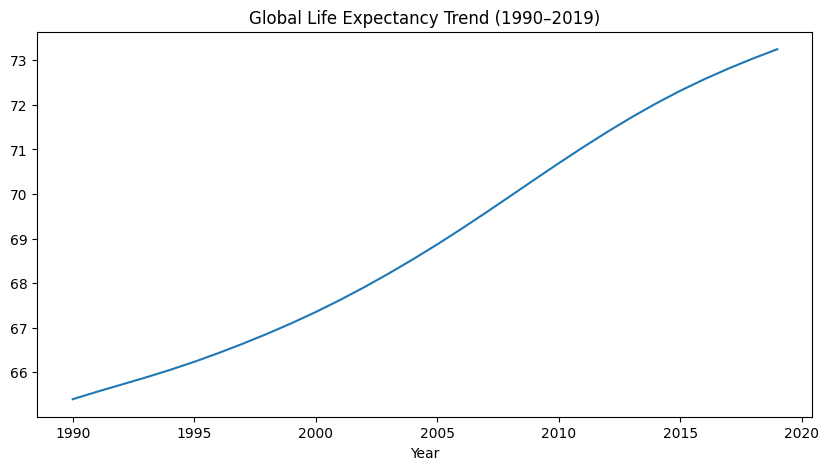

In [44]:
df_clean.groupby("Year")["Life_Expectancy"].mean().plot(figsize=(10,5), title="Global Life Expectancy Trend (1990–2019)")


INDIA

<Axes: title={'center': 'Life Expectancy in India (1990–2019)'}, xlabel='Year'>

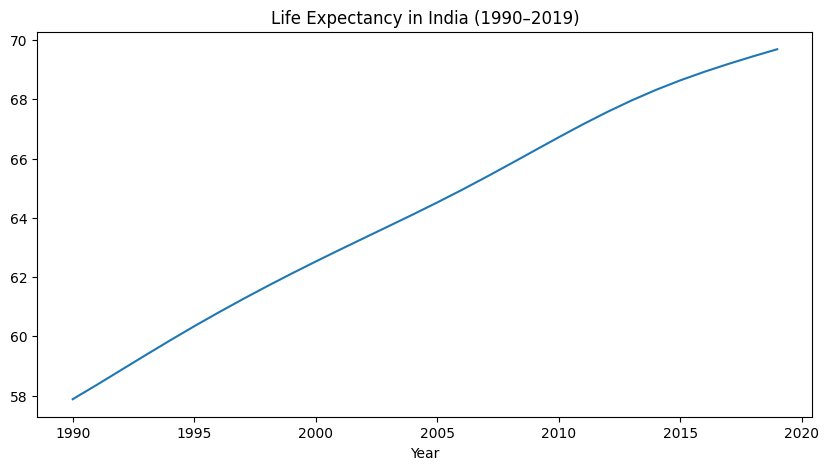

In [45]:
india = df_clean[df_clean.Country == "India"]
india.groupby("Year")["Life_Expectancy"].mean().plot(figsize=(10,5), title="Life Expectancy in India (1990–2019)")


India vs China analysis

In [54]:
india = df_clean[df_clean["Country"] == "India"]
china = df_clean[df_clean["Country"] == "China"]


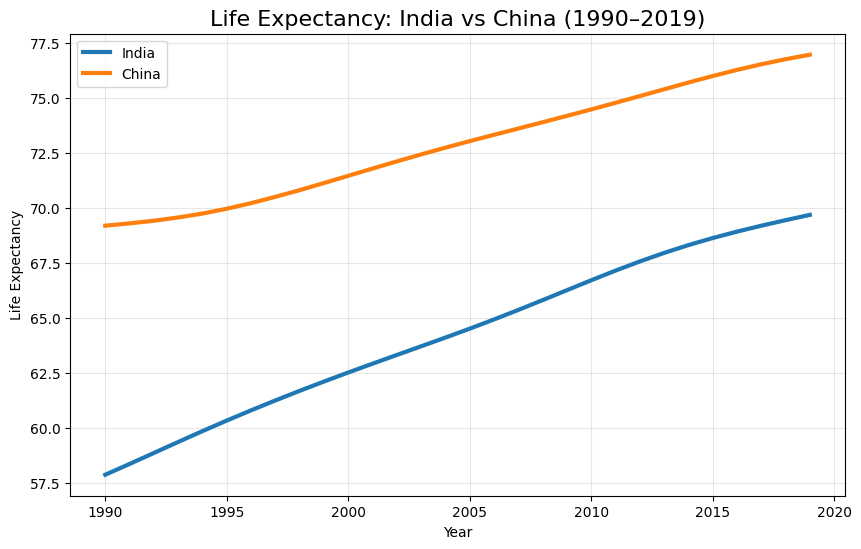

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(india.groupby("Year")["Life_Expectancy"].mean(), label="India", linewidth=3)
plt.plot(china.groupby("Year")["Life_Expectancy"].mean(), label="China", linewidth=3)

plt.title("Life Expectancy: India vs China (1990–2019)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


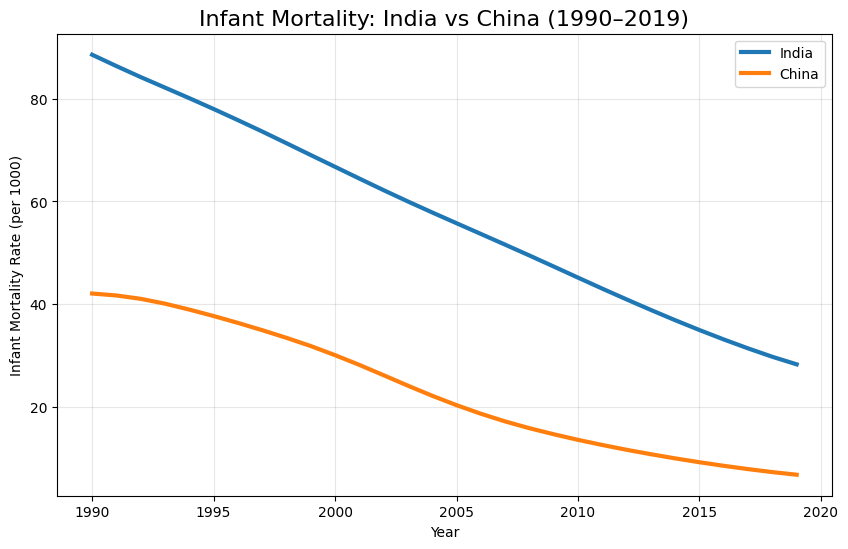

In [48]:
plt.figure(figsize=(10,6))

plt.plot(india.groupby("Year")["Infant_Mortality_Rate"].mean(), label="India", linewidth=3)
plt.plot(china.groupby("Year")["Infant_Mortality_Rate"].mean(), label="China", linewidth=3)

plt.title("Infant Mortality: India vs China (1990–2019)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Infant Mortality Rate (per 1000)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


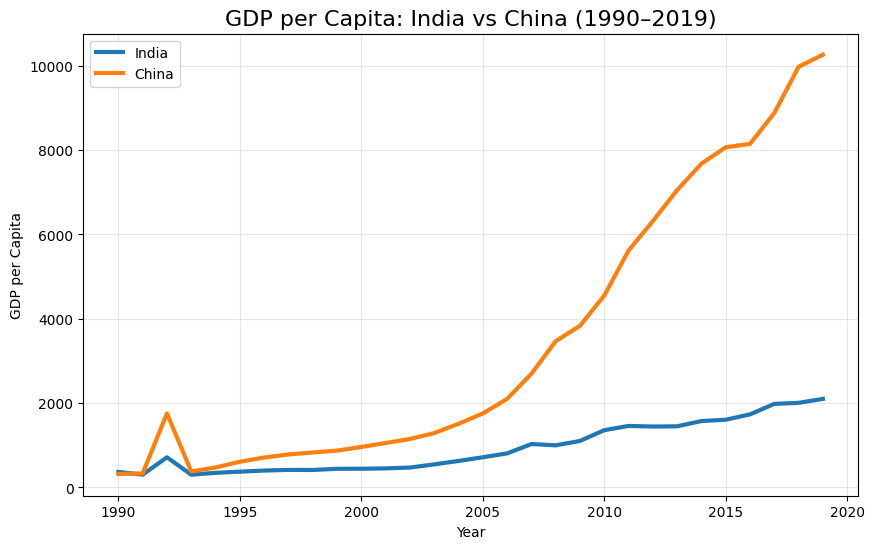

In [49]:
plt.figure(figsize=(10,6))

plt.plot(india.groupby("Year")["GDP_per_Capita"].mean(), label="India", linewidth=3)
plt.plot(china.groupby("Year")["GDP_per_Capita"].mean(), label="China", linewidth=3)

plt.title("GDP per Capita: India vs China (1990–2019)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


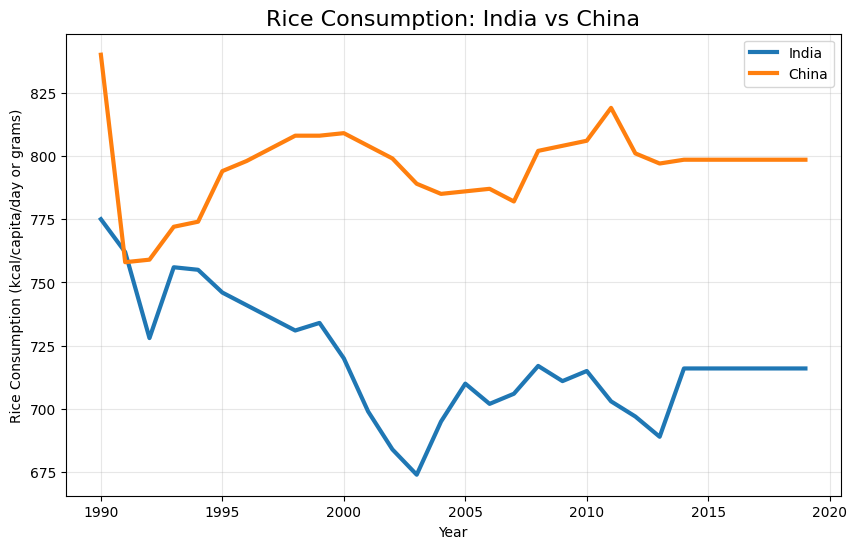

In [50]:
plt.figure(figsize=(10,6))

plt.plot(india.groupby("Year")["Cereal_Consumption_Rice"].mean(), label="India", linewidth=3)
plt.plot(china.groupby("Year")["Cereal_Consumption_Rice"].mean(), label="China", linewidth=3)

plt.title("Rice Consumption: India vs China", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Rice Consumption (kcal/capita/day or grams)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


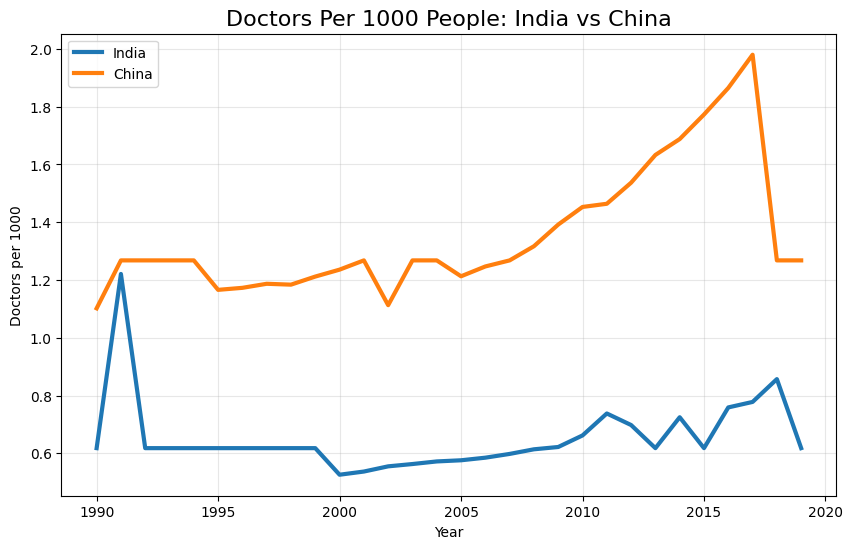

In [55]:
plt.figure(figsize=(10,6))

plt.plot(india.groupby("Year")["Doctors"].mean(), label="India", linewidth=3)
plt.plot(china.groupby("Year")["Doctors"].mean(), label="China", linewidth=3)

plt.title("Doctors Per 1000 People: India vs China", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Doctors per 1000")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [52]:
df_clean["Doctors"] = df_clean["Doctors"] / 10


In [56]:
india["Doctors"].describe()
china["Doctors"].describe()


count    90.000000
mean      1.353833
std       0.221994
min       1.102000
25%       1.213000
50%       1.268000
75%       1.453000
max       1.980000
Name: Doctors, dtype: float64

In [57]:
df_pair = df_clean[df_clean["Country"].isin(["India", "China"])]
df_pair[["Life_Expectancy", "GDP_per_Capita", "Infant_Mortality_Rate", "Doctors"]].corr()


,Life_Expectancy,GDP_per_Capita,Infant_Mortality_Rate,Doctors
Life_Expectancy,1.000000,0.701094,-0.970416,0.796765
GDP_per_Capita,0.701094,1.000000,-0.711330,0.682785
Infant_Mortality_Rate,-0.970416,-0.711330,1.000000,-0.762457
Doctors,0.796765,0.682785,-0.762457,1.000000


1. Life Expectancy vs Infant Mortality (–0.97): 
If infant mortality goes down → life expectancy goes UP
2. Life Expectancy vs Doctors (0.79): 
Countries with more doctors per population have higher life expectancy.
3. Life Expectancy vs GDP per Capita (0.70): 
Richer countries tend to live longer.
4. GDP per Capita vs Doctors (0.68): 
Richer countries can hire more doctors.


INDIA VS SRI LANKA 

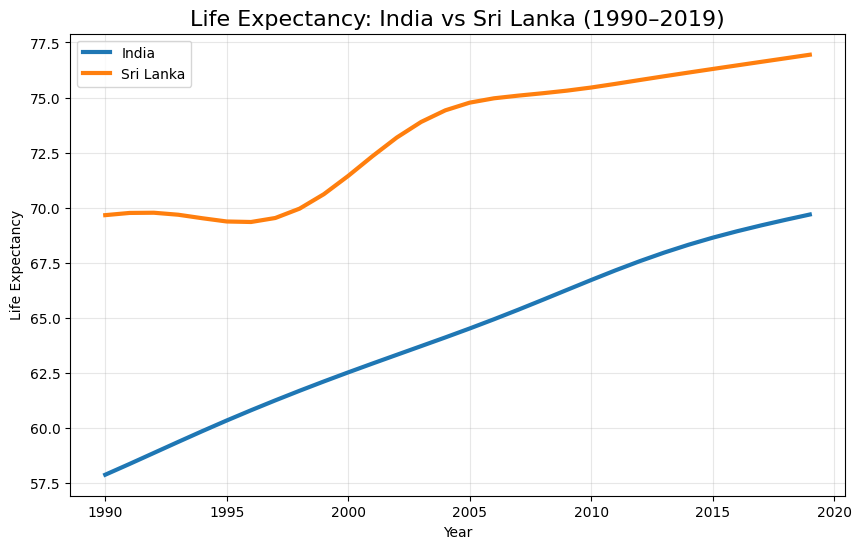

In [58]:
sl = df_clean[df_clean["Country"] == "Sri Lanka"]
india = df_clean[df_clean["Country"] == "India"]

plt.figure(figsize=(10,6))
plt.plot(india.groupby("Year")["Life_Expectancy"].mean(), label="India", linewidth=3)
plt.plot(sl.groupby("Year")["Life_Expectancy"].mean(), label="Sri Lanka", linewidth=3)

plt.title("Life Expectancy: India vs Sri Lanka (1990–2019)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


INDIA VS GLOBAL AVERAGE

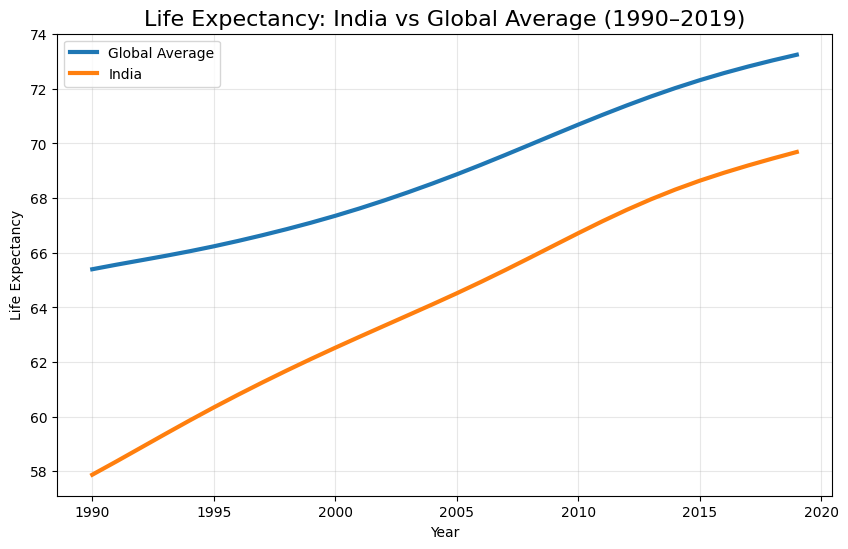

In [59]:
global_avg = df_clean.groupby("Year")["Life_Expectancy"].mean()

plt.figure(figsize=(10,6))
plt.plot(global_avg, label="Global Average", linewidth=3)
plt.plot(india.groupby("Year")["Life_Expectancy"].mean(), label="India", linewidth=3)

plt.title("Life Expectancy: India vs Global Average (1990–2019)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


MACHINE LEARNING MODEL

In [60]:
df_ml = df_clean.copy()

# Drop non-numeric or ID-like columns
df_ml = df_ml.drop(columns=["Country", "Gender"])

# Target (what we want to predict)
y = df_ml["Life_Expectancy"]

# Features (inputs)
X = df_ml.drop(columns=["Life_Expectancy"])


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,     
    random_state=42
)

model.fit(X_train, y_train) 


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
model.score(X_test, y_test)


0.9297678345583512

In [64]:
import pandas as pd

importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

importance.head(20)


,feature,importance
17,Maternal_Mortality_Ratio,0.452331
35,Death_Rate,0.128269
36,GDP_per_Capita,0.085810
19,High_CI_Value_Maternal_Mortality_Ratio,0.048440
61,Fruit_Consumption_Oranges_And_Mandarines,0.039313
18,Low_CI_Value_Maternal_Mortality_Ratio,0.035986
16,percent_Population_Aged_80,0.023432
0,Year,0.019858
9,High_CI_Value_percent_Death_Cardiovascular,0.011556
7,percent_Death_Cardiovascular,0.010471


/var/folders/8y/crcb0jp96md8jnqcrmbyd2cc0000gn/T/ipykernel_18888/2633667265.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x="importance", y="feature", palette="viridis")


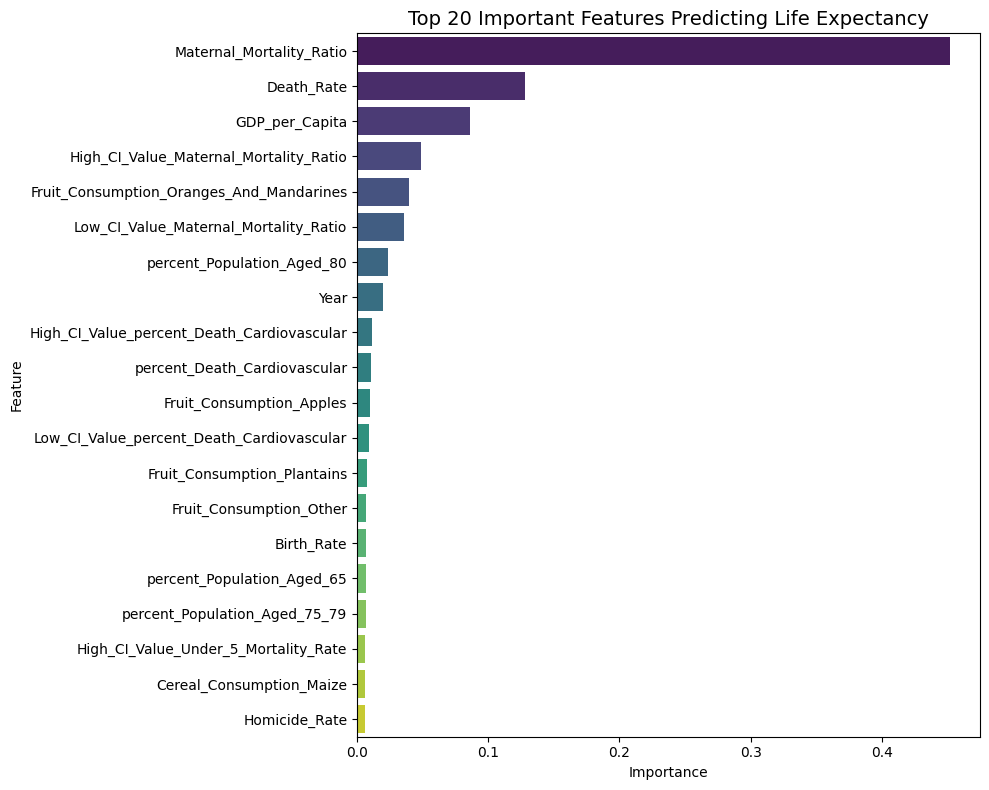

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

top20 = importance.head(20)

plt.figure(figsize=(10,8))
sns.barplot(data=top20, x="importance", y="feature", palette="viridis")
plt.title("Top 20 Important Features Predicting Life Expectancy", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [66]:
!pip install shap

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.6/555.6 kB 2.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 3.4 MB/s  0:00:10a 0:00:010:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.7 MB/s  0:00:004.5 MB/s eta 0:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [shap]━━━━━━━━━━━━━ 4/6 [numba]


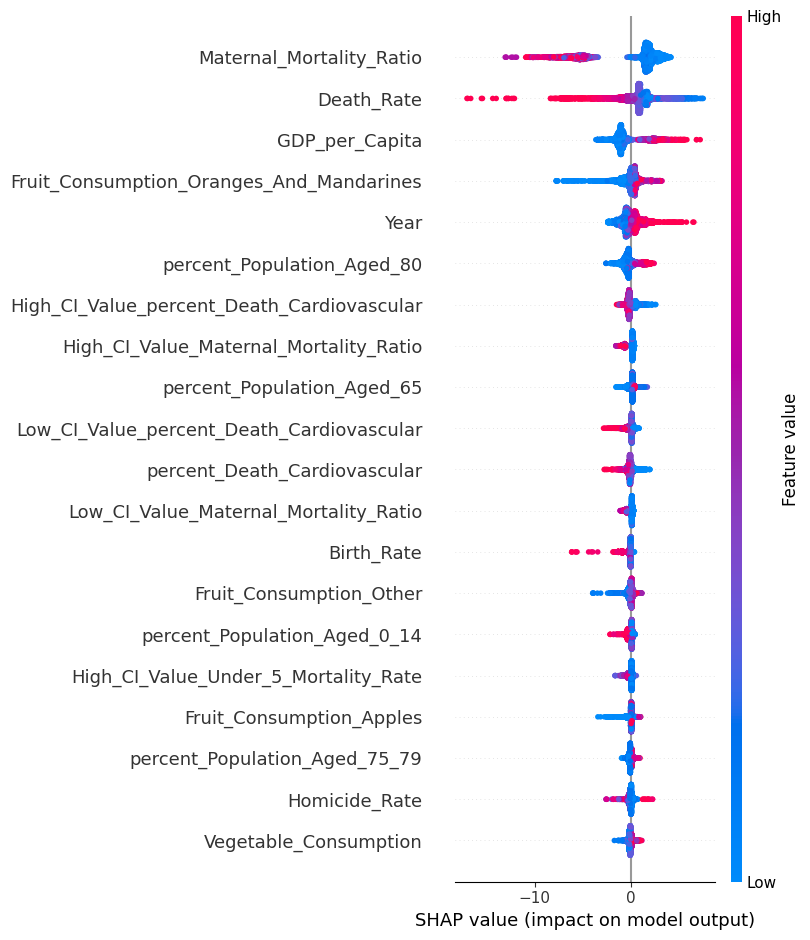

In [67]:
import shap

# Create the SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance + impact direction)
shap.summary_plot(shap_values, X_test, plot_type="dot")


In [70]:
def predict_life_expectancy(country, year, gender='Both sexes'):
    # Filter the row
    row = df_clean[
        (df_clean['Country'] == country) &
        (df_clean['Year'] == year) &
        (df_clean['Gender'] == gender)
    ]
    
    if row.empty:
        return "Data not available for this country/year/gender."
    
    # Keep only columns model was trained on (same as X.columns)
    X_input = row[X.columns]

    # Predict
    prediction = model.predict(X_input)[0]
    return prediction


In [74]:
print("India 2019:", predict_life_expectancy("India", 2019))
print("Sri Lanka 2019:", predict_life_expectancy("Sri Lanka", 2019))
print("China 2019:", predict_life_expectancy("China", 2019))
print("United States 2019:", predict_life_expectancy("United States", 2019))


India 2019: 69.7193873333334
Sri Lanka 2019: 76.99469666666641
China 2019: 76.92183000000013
United States 2019: 78.86955333333339


In [72]:
sorted([c for c in df_clean['Country'].unique() if "United" in c or "America" in c])


['American Samoa',
 'Americas',
 'Central America',
 'Europe and Northern America',
 'Latin America and the Caribbean',
 'Northern America',
 'South America',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'United States Virgin Islands']

In [76]:
import shap
shap.initjs()


In [77]:
def shap_country_plot(country, year=2019):
    row = df_clean[
        (df_clean['Country'] == country) &
        (df_clean['Year'] == year) &
        (df_clean['Gender'] == 'Both sexes')
    ]
    X_in = row[X.columns]
    shap_val = explainer.shap_values(X_in)
    return shap.force_plot(explainer.expected_value, shap_val, X_in)

shap_country_plot("India")


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Numeric dataset
cluster_df = df_clean.drop(columns=["Country", "Gender", "Life_Expectancy"])

# Standardize
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)


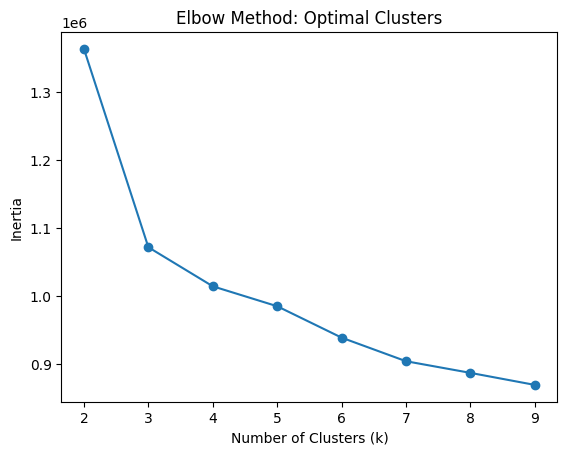

In [79]:
import matplotlib.pyplot as plt

inertia = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(cluster_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method: Optimal Clusters")
plt.show()


In [80]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(cluster_scaled)


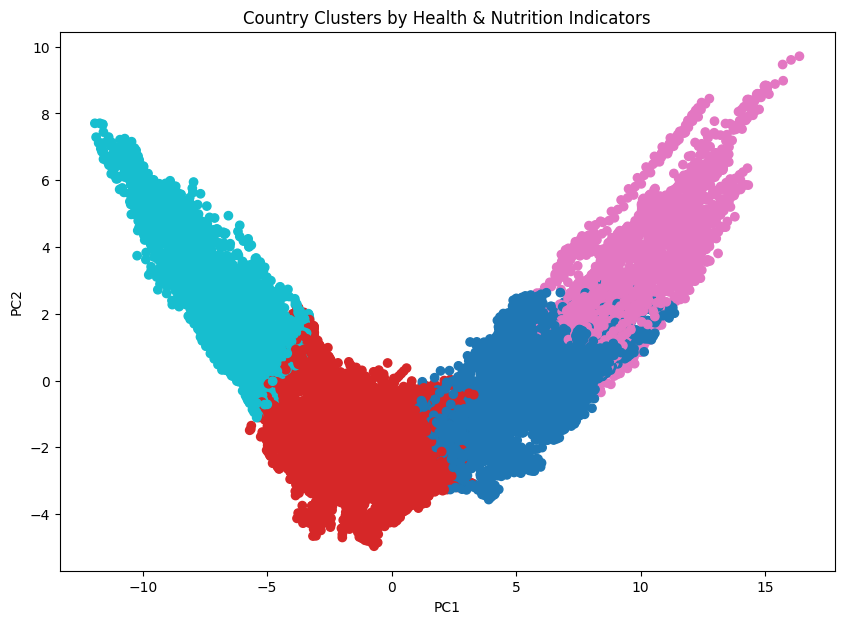

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_comp = pca.fit_transform(cluster_scaled)

plt.figure(figsize=(10,7))
plt.scatter(pca_comp[:,0], pca_comp[:,1], c=df_clean["Cluster"], cmap="tab10")
plt.title("Country Clusters by Health & Nutrition Indicators")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [82]:
df_clean[df_clean["Country"].isin(["India", "China", "Sri Lanka"])][["Country", "Year", "Cluster"]].head(10)


,Country,Year,Cluster
3960,China,1990,1
3961,China,1990,1
3962,China,1990,1
3963,China,1991,1
3964,China,1991,1
3965,China,1991,1
3966,China,1992,1
3967,China,1992,1
3968,China,1992,1
3969,China,1993,1


In [83]:
df_clean[df_clean["Country"].isin(["India", "Sri Lanka"])][["Country", "Year", "Cluster"]].drop_duplicates()


,Country,Year,Cluster
8790,India,1990,2
8793,India,1991,2
8796,India,1992,2
8799,India,1993,2
8802,India,1994,0
8803,India,1994,2
8805,India,1995,0
8808,India,1996,0
8811,India,1997,0
8814,India,1998,0


In [85]:
cols_for_clustering = df_clean.drop(columns=["Country", "Gender", "Life_Expectancy", "Cluster"]).columns.tolist()
cols_for_clustering[:10]  # preview the first 10 columns



['Year',
 'Infant_Mortality_Rate',
 'Low_CI_Value_Infant_Mortality_Rate',
 'High_CI_Value_Infant_Mortality_Rate',
 'Under_5_Mortality_Rate',
 'Low_CI_Value_Under_5_Mortality_Rate',
 'High_CI_Value_Under_5_Mortality_Rate',
 'percent_Death_Cardiovascular',
 'Low_CI_Value_percent_Death_Cardiovascular',
 'High_CI_Value_percent_Death_Cardiovascular']

In [86]:
cluster_stats = df_clean.groupby("Cluster")[cols_for_clustering].mean()
cluster_stats


,Year,Infant_Mortality_Rate,Low_CI_Value_Infant_Mortality_Rate,High_CI_Value_Infant_Mortality_Rate,Under_5_Mortality_Rate,Low_CI_Value_Under_5_Mortality_Rate,High_CI_Value_Under_5_Mortality_Rate,percent_Death_Cardiovascular,Low_CI_Value_percent_Death_Cardiovascular,High_CI_Value_percent_Death_Cardiovascular,percent_Population_Aged_0_14,percent_Population_Aged_15_64,percent_Population_Aged_65,percent_Population_Aged_65_69,percent_Population_Aged_70_74,percent_Population_Aged_75_79,percent_Population_Aged_80,Maternal_Mortality_Ratio,Low_CI_Value_Maternal_Mortality_Ratio,High_CI_Value_Maternal_Mortality_Ratio,percent_of_Births_Attended_By_Skilled_Personal,Neonatal_Mortality_Rate,Low_CI_Value_Neonatal_Mortality_Rate,High_CI_Value_Neonatal_Mortality_Rate,Incidence_of_Tuberculosis,Low_CI_Value_Incidence_of_Tuberculosis,High_CI_Value_Incidence_of_Tuberculosis,Doctors,Nurses_and_Midwifes,Basic_Drinking_Water_Services,Basic_Sanization_Services_Total,Basic_Sanization_Services_Urban,Basic_Sanization_Services_Rural,Clean_Fuel_and_Technology,Birth_Rate,Death_Rate,GDP_per_Capita,Income_per_Capita,Total_Population,GNI_per_Capita,Conflict_and_Terrorism_Deaths,Homicide_Rate,Government_Expenditure_Education,Government_Expenditure_Military,Government_Expenditure_Health,Diet_Composition_Alcoholic_Beverages,Diet_Composition_Other,Diet_Composition_Sugar,Diet_Composition_Oils_And_Fats,Diet_Composition_Meat,Diet_Composition_Dairy_And_Eggs,Diet_Composition_Fruit_And_Vegetables,Diet_Composition_Starchy_Roots,Diet_Composition_Pulses,Diet_Composition_Cereals_And_Grains,Vegetable_Consumption,Fruit_Consumption_Plantains,Fruit_Consumption_Other,Fruit_Consumption_Bananas,Fruit_Consumption_Dates,Fruit_Consumption_Other_Citrus,Fruit_Consumption_Oranges_And_Mandarines,Fruit_Consumption_Apples,Fruit_Consumption_Lemons_And_Limes,Fruit_Consumption_Grapes,Fruit_Consumption_Grapefruit,Fruit_Consumption_Pineapples,Cereal_Consumption_Oats,Cereal_Consumption_Rye,Cereal_Consumption_Barley,Cereal_Consumption_Maize,Cereal_Consumption_Wheat,Cereal_Consumption_Rice,Diet_Calories_Animal_Protein,Diet_Calories_Plant_Protein,Diet_Calories_Fat,Diet_Calories_Carbohydrates
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2005.752246,44.462705,38.561438,51.635584,61.621805,52.548501,73.192154,28.100051,18.405456,39.389859,40.383020,56.175042,3.444458,1.423706,0.989748,0.601203,0.427629,345.435558,262.850193,462.121053,61.329633,26.806303,21.960647,32.998729,346.459564,229.623107,489.608344,0.383456,13.499082,57.055349,39.340890,54.490268,31.581724,23.039281,33.113064,9.421861,1611.546117,1197.839141,4.639152e+07,1548.428755,301.220308,8.843980,16.483431,7.757908,2.778233,41.147754,19.639024,184.535173,285.578306,136.494608,82.835687,126.454685,249.907317,64.787420,1125.822080,46.061077,13.009288,15.948271,17.659331,0.445670,0.342322,4.426602,1.884172,0.875664,0.857868,0.735068,1.979231,1.314249,0.554814,3.881643,289.932092,301.481772,390.909114,72.120288,165.768252,474.495331,1621.758745
1,2004.486700,21.028092,18.378892,23.959493,24.986845,21.783710,28.751736,21.252552,15.678662,27.516039,30.067487,63.777177,5.733897,2.122643,1.561069,1.047509,0.976467,61.788861,47.699501,80.340524,94.697897,13.524756,11.147663,16.488835,55.907362,42.661635,70.736658,1.406377,39.012062,86.935536,86.385609,88.472655,72.065966,80.632502,20.748690,7.083402,7601.825725,4091.980420,7.446520e+07,6605.411996,233.693483,7.954672,14.698553,7.079818,3.121517,56.278096,33.588944,307.126933,360.731006,228.135245,182.030673,160.734497,102.532544,49.057357,1126.914838,85.267739,4.000698,23.067028,10.322766,1.621485,0.704177,13.760606,6.966209,1.980420,4.419749,2.543615,3.044333,2.342934,2.624106,9.333707,135.599169,597.194846,235.071613,127.632284,168.507448,675.225901,1711.386637
2,2000.690407,95.177175,86.311114,105.761095,155.359293,138.907146,175.226395,25.814535,15.806783,37.959714,45.344454,51.615406,3.040139,1.304078,0.888295,0.520213,0.332349,777.213178,587.460998,1

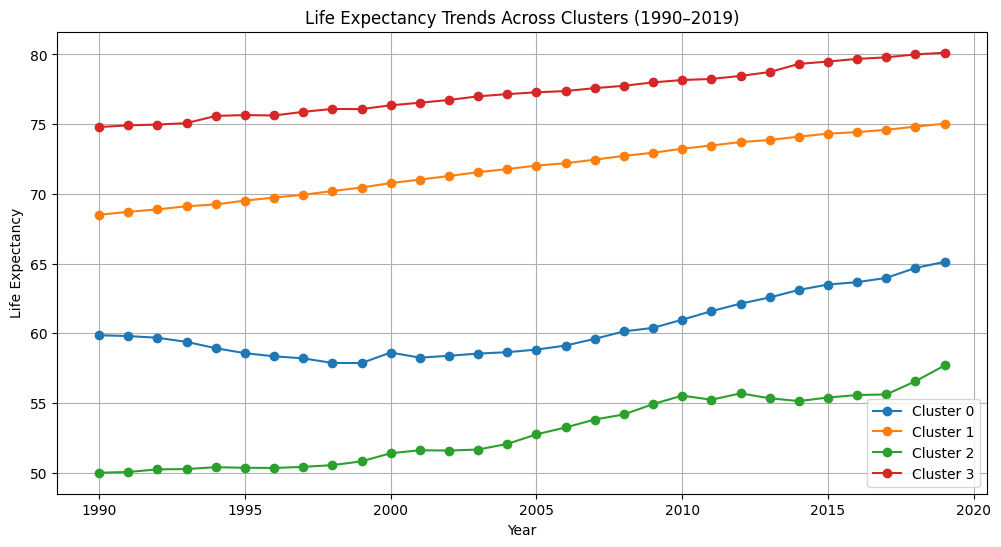

In [87]:
plt.figure(figsize=(12,6))
for c in sorted(df_clean.Cluster.unique()):
    le = df_clean[df_clean.Cluster == c].groupby("Year")["Life_Expectancy"].mean()
    plt.plot(le.index, le.values, label=f"Cluster {c}", marker="o")

plt.title("Life Expectancy Trends Across Clusters (1990–2019)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()
plt.grid(True)
plt.show()


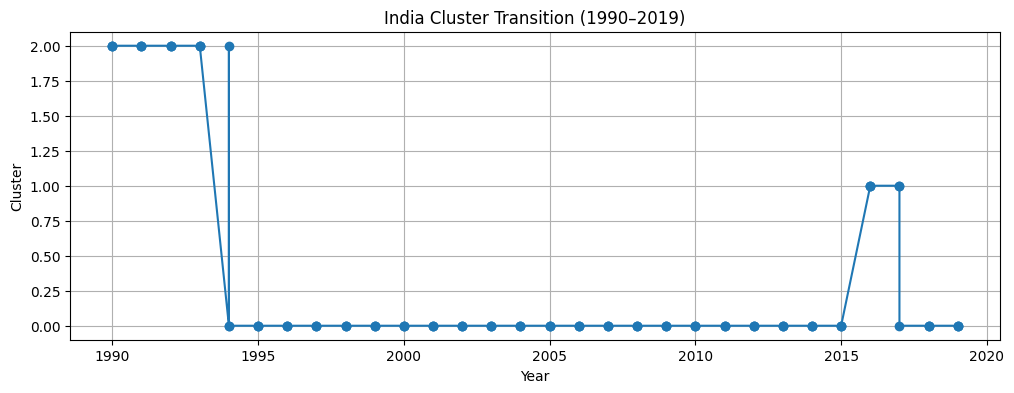

In [88]:
india = df_clean[df_clean.Country == "India"]

plt.figure(figsize=(12,4))
plt.plot(india["Year"], india["Cluster"], marker="o")
plt.title("India Cluster Transition (1990–2019)")
plt.xlabel("Year")
plt.ylabel("Cluster")
plt.grid(True)
plt.show()


In [89]:
# 1. Select important features (you can include more if needed)
important_features = [
    "Maternal_Mortality_Ratio",
    "Infant_Mortality_Rate",
    "Under_5_Mortality_Rate",
    "Neonatal_Mortality_Rate",
    "Doctors",
    "Nurses_and_Midwifes",
    "GDP_per_Capita",
    "Basic_Drinking_Water_Services",
    "Basic_Sanization_Services_Total",
    "Clean_Fuel_and_Technology",
    "percent_Population_Aged_0_14",
    "percent_Population_Aged_65",
    "Diet_Composition_Fruit_And_Vegetables",
    "Diet_Composition_Dairy_And_Eggs",
    "Diet_Composition_Meat"
]

# 2. India recent average (2015–2019)
india_recent = df_clean[(df_clean.Country == "India") & (df_clean.Year >= 2015)][important_features].mean()

# 3. Cluster 1 average
cluster1_avg = df_clean[df_clean.Cluster == 1][important_features].mean()

# 4. Gap = Cluster 1 - India
gap = (cluster1_avg - india_recent).sort_values(ascending=False)
gap


GDP_per_Capita                           5716.769166
Diet_Composition_Meat                     203.135245
Diet_Composition_Fruit_And_Vegetables      71.734497
Diet_Composition_Dairy_And_Eggs            70.530673
Basic_Sanization_Services_Total            37.161609
Clean_Fuel_and_Technology                  37.032502
Nurses_and_Midwifes                        23.086062
percent_Population_Aged_0_14                2.571052
Doctors                                     0.680377
Basic_Drinking_Water_Services               0.061536
percent_Population_Aged_65                 -0.268658
Neonatal_Mortality_Rate                   -10.183244
Infant_Mortality_Rate                     -10.448575
Under_5_Mortality_Rate                    -13.737155
Maternal_Mortality_Ratio                 -121.811139
dtype: float64

In [90]:
import sqlite3
conn = sqlite3.connect("health.db")
df_clean.to_sql("health", conn, if_exists="replace", index=False)


22050

In [91]:
pd.read_sql_query("SELECT * FROM health LIMIT 5;", conn)


,Country,Year,Gender,Life_Expectancy,Infant_Mortality_Rate,Low_CI_Value_Infant_Mortality_Rate,High_CI_Value_Infant_Mortality_Rate,Under_5_Mortality_Rate,Low_CI_Value_Under_5_Mortality_Rate,High_CI_Value_Under_5_Mortality_Rate,percent_Death_Cardiovascular,Low_CI_Value_percent_Death_Cardiovascular,High_CI_Value_percent_Death_Cardiovascular,percent_Population_Aged_0_14,percent_Population_Aged_15_64,percent_Population_Aged_65,percent_Population_Aged_65_69,percent_Population_Aged_70_74,percent_Population_Aged_75_79,percent_Population_Aged_80,Maternal_Mortality_Ratio,Low_CI_Value_Maternal_Mortality_Ratio,High_CI_Value_Maternal_Mortality_Ratio,percent_of_Births_Attended_By_Skilled_Personal,Neonatal_Mortality_Rate,Low_CI_Value_Neonatal_Mortality_Rate,High_CI_Value_Neonatal_Mortality_Rate,Incidence_of_Tuberculosis,Low_CI_Value_Incidence_of_Tuberculosis,High_CI_Value_Incidence_of_Tuberculosis,Doctors,Nurses_and_Midwifes,Basic_Drinking_Water_Services,Basic_Sanization_Services_Total,Basic_Sanization_Services_Urban,Basic_Sanization_Services_Rural,Clean_Fuel_and_Technology,Birth_Rate,Death_Rate,GDP_per_Capita,Income_per_Capita,Total_Population,GNI_per_Capita,Conflict_and_Terrorism_Deaths,Homicide_Rate,Government_Expenditure_Education,Government_Expenditure_Military,Government_Expenditure_Health,Diet_Composition_Alcoholic_Beverages,Diet_Composition_Other,Diet_Composition_Sugar,Diet_Composition_Oils_And_Fats,Diet_Composition_Meat,Diet_Composition_Dairy_And_Eggs,Diet_Composition_Fruit_And_Vegetables,Diet_Composition_Starchy_Roots,Diet_Composition_Pulses,Diet_Composition_Cereals_And_Grains,Vegetable_Consumption,Fruit_Consumption_Plantains,Fruit_Consumption_Other,Fruit_Consumption_Bananas,Fruit_Consumption_Dates,Fruit_Consumption_Other_Citrus,Fruit_Consumption_Oranges_And_Mandarines,Fruit_Consumption_Apples,Fruit_Consumption_Lemons_And_Limes,Fruit_Consumption_Grapes,Fruit_Consumption_Grapefruit,Fruit_Consumption_Pineapples,Cereal_Consumption_Oats,Cereal_Consumption_Rye,Cereal_Consumption_Barley,Cereal_Consumption_Maize,Cereal_Consumption_Wheat,Cereal_Consumption_Rice,Diet_Calories_Animal_Protein,Diet_Calories_Plant_Protein,Diet_Calories_Fat,Diet_Calories_Carbohydrates,Cluster
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,38.05,23.4,54.05,48.308220,49.459238,2.232542,1.042360,0.681267,0.370710,0.223838,1011.5,798.5,1270.0,38.6,74.31,66.35,83.12,189.0,122.0,270.0,0.239,3.45,37.1,32.28,43.305,28.91,19.0,48.880,15.241,500.426925,496.339638,12412308.0,530.0,1519.8538,12.791298,15.063655,6.706276,1.385584,0.0,12.0,35.0,206.0,129.0,113.0,75.0,36.0,19.0,1689.0,37.19,0.1,19.39,0.03,0.0,0.45,0.94,1.35,1.055,14.03,0.52,0.0,1.0,0.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52,2
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,38.05,23.4,54.05,48.034871,49.574715,2.390414,1.137318,0.716730,0.359494,0.176871,1011.5,798.5,1270.0,38.6,74.31,66.35,83.12,189.0,122.0,270.0,0.239,3.45,37.1,32.28,43.305,28.91,19.0,48.880,15.241,500.426925,496.339638,12412308.0,530.0,1519.8538,12.791298,15.063655,6.706276,1.385584,0.0,12.0,35.0,206.0,129.0,113.0,75.0,36.0,19.0,1689.0,37.19,0.1,19.39,0.03,0.0,0.45,0.94,1.35,1.055,14.03,0.52,0.0,1.0,0.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52,2
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,38.05,23.4,54.05,48.569646,49.348779,2.081576,1.021449,0.605111,0.300727,0.154288,1011.5,798.5,1270.0,38.6,74.31,66.35,83.12,189.0,122.0,270.0,0.239,3.45,37.1,32.28,43.305,28.91,19.0,48.880,15.241,500.426925,496.339638,12412308.0,530.0,1519.8538,12.791298,15.063655,6.706276,1.385584,0.0,12.0,35.0,206.0,129.0,113.0,75.0,36.0,19.0,1689.0,37.19,0.1,19.39,0.03,0.0,0.45,0.94,1.35,1.055,14.03,0.52,0.0,1.0,0.0,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52,2
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,38.05,23.4,54.05,48.217361,49.540308,2.242331,1.042360,0.681267,0.370710,0.223838,1011.5,798.5,1270.0,38.6,72.90,65.24,81.17,189.0,122.0

Top life expectancy countries 2019

In [93]:
query = """
SELECT Country, Life_Expectancy
FROM health
WHERE Year = 2019
ORDER BY Life_Expectancy DESC
LIMIT 10;
"""

pd.read_sql_query(query, conn)


,Country,Life_Expectancy
0,Hong Kong,87.747
1,Japan,87.669
2,Macao,87.179
3,Monaco,86.751
4,Spain,86.248
5,South Korea,85.954
6,Singapore,85.728
7,Martinique,85.617
8,Switzerland,85.596
9,Italy,85.539


Top 10 countries with lowest life expectancy in 2019

In [96]:
query = """
SELECT Country, Life_Expectancy
FROM health
WHERE Year = 2019
ORDER BY Life_Expectancy ASC
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Country,Life_Expectancy
0,Central African Republic,51.081
1,Lesotho,51.201
2,Chad,52.835
3,Central African Republic,53.283
4,Nigeria,53.789
5,Sierra Leone,53.853
6,Chad,54.239
7,Lesotho,54.331
8,Nigeria,54.687
9,Sierra Leone,54.696


India vs China Life Expectancy Over Time

In [97]:
query = """
SELECT Year, Country, Life_Expectancy
FROM health
WHERE Country IN ('India', 'China')
ORDER BY Year, Country;
"""
pd.read_sql_query(query, conn)


,Year,Country,Life_Expectancy
0,1990,China,69.145
1,1990,China,71.004
2,1990,China,67.446
3,1990,India,57.865
4,1990,India,58.226
5,1990,India,57.536
6,1991,China,69.242
7,1991,China,71.200
8,1991,China,67.468
9,1991,India,58.353


Average Life Expectancy per Cluster

In [98]:
query = """
SELECT Cluster, AVG(Life_Expectancy) AS avg_life_exp
FROM health
GROUP BY Cluster
ORDER BY avg_life_exp DESC;
"""
pd.read_sql_query(query, conn)


,Cluster,avg_life_exp
0,3,77.423127
1,1,71.816308
2,0,60.635859
3,2,51.922811


Countries with Most Doctors

In [99]:
query = """
SELECT Country, AVG(Doctors) AS avg_doctors
FROM health
GROUP BY Country
HAVING avg_doctors > 0
ORDER BY avg_doctors DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)



,Country,avg_doctors
0,Monaco,6.396633
1,Cuba,6.231500
2,San Marino,5.098633
3,Italy,4.343867
4,Georgia,4.249567
5,Austria,4.177533
6,Greece,4.151400
7,Uruguay,3.983333
8,Israel,3.875267
9,Switzerland,3.842467


Countries with Least Doctors

In [101]:
query = """
SELECT Country, AVG(Doctors) AS avg_doctors
FROM health
GROUP BY Country
HAVING avg_doctors > 0
ORDER BY avg_doctors ASC
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Country,avg_doctors
0,Malawi,0.019600
1,Sierra Leone,0.023033
2,Liberia,0.024400
3,Somalia,0.025500
4,Tanzania,0.028133
5,Niger,0.029400
6,Ethiopia,0.031567
7,Chad,0.037500
8,Burkina Faso,0.049600
9,Papua New Guinea,0.050100


Highest Maternal Mortality Countries

In [103]:
query = """
SELECT Country, AVG(Maternal_Mortality_Ratio) AS mmr
FROM health
GROUP BY Country
ORDER BY mmr DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Country,mmr
0,Sierra Leone,1538.666667
1,Chad,1278.000000
2,South Sudan,1274.666667
3,Central African Republic,1079.200000
4,Nigeria,1015.700000
5,Afghanistan,1013.200000
6,Somalia,1001.366667
7,Guinea-Bissau,853.400000
8,Mauritania,817.466667
9,Guinea,802.200000


Safest Countries (Lowest Homicide Rate)

In [104]:
query = """
SELECT Country, AVG(Homicide_Rate) AS homicide
FROM health
GROUP BY Country
ORDER BY homicide ASC
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Country,homicide
0,Egypt,0.596141
1,Oman,0.613456
2,Tunisia,0.721238
3,Japan,0.762606
4,United Kingdom,0.769784
5,Saudi Arabia,0.822965
6,Iceland,0.909000
7,Andorra,0.913133
8,Ireland,0.938662
9,Burundi,0.940291


Countries with Highest Clean Fuel Access

In [105]:
query = """
SELECT Country, AVG(Clean_Fuel_and_Technology) AS clean_fuel
FROM health
GROUP BY Country
ORDER BY clean_fuel DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Country,clean_fuel
0,Venezuela,95.0
1,Uruguay,95.0
2,United States,95.0
3,United Kingdom,95.0
4,United Arab Emirates,95.0
5,Turkmenistan,95.0
6,Tunisia,95.0
7,Trinidad and Tobago,95.0
8,Syria,95.0
9,Switzerland,95.0


Countries with Lowest Sanitation Access

In [106]:
query = """
SELECT Country, AVG(Basic_Sanization_Services_Total) AS sanitation
FROM health
GROUP BY Country
ORDER BY sanitation ASC
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Country,sanitation
0,Ethiopia,5.358000
1,Madagascar,7.398667
2,South Sudan,8.818000
3,Niger,9.727667
4,Chad,10.598667
5,Eritrea,10.652667
6,Benin,12.624000
7,Sierra Leone,12.740667
8,Togo,12.789000
9,Ghana,13.101333



Most Improved Countries (Life Expectancy Growth)

In [107]:
query = """
SELECT Country,
       MAX(Life_Expectancy) - MIN(Life_Expectancy) AS improvement
FROM health
GROUP BY Country
ORDER BY improvement DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Country,improvement
0,Rwanda,46.298
1,Zambia,25.516
2,Uganda,25.022
3,Timor,24.656
4,Malawi,24.577
5,Botswana,24.416
6,Eswatini,24.182
7,Lesotho,23.517
8,Ethiopia,22.920
9,Zimbabwe,21.533


India's Life Expectancy Improvement (1990 → 2019)

In [108]:
query = """
SELECT 
    (SELECT Life_Expectancy FROM health WHERE Country='India' AND Year=2019) -
    (SELECT Life_Expectancy FROM health WHERE Country='India' AND Year=1990)
AS improvement;
"""
pd.read_sql_query(query, conn)


,improvement
0,11.791


Top Fruit-Consuming Countries

In [109]:
query = """
SELECT Country,
       AVG(Fruit_Consumption_Apples + Fruit_Consumption_Bananas + Fruit_Consumption_Other) AS total_fruit
FROM health
GROUP BY Country
ORDER BY total_fruit DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Country,total_fruit
0,Rwanda,307.667667
1,Sao Tome and Principe,154.780333
2,Samoa,145.298000
3,Bermuda,131.844667
4,Antigua and Barbuda,125.386000
5,Ecuador,114.669333
6,Montenegro,102.534333
7,Saint Lucia,101.693000
8,Austria,101.643333
9,Luxembourg,94.970667


Highest IMR + MMR Countries

In [111]:
query = """
SELECT Country,
       AVG(Maternal_Mortality_Ratio) AS mmr,
       AVG(Infant_Mortality_Rate) AS imr
FROM health
GROUP BY Country
ORDER BY mmr DESC, imr DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)



,Country,mmr,imr
0,Sierra Leone,1538.666667,122.865556
1,Chad,1278.000000,92.185000
2,South Sudan,1274.666667,94.638556
3,Central African Republic,1079.200000,103.597889
4,Nigeria,1015.700000,98.990667
5,Afghanistan,1013.200000,79.493111
6,Somalia,1001.366667,96.909111
7,Guinea-Bissau,853.400000,90.027889
8,Mauritania,817.466667,64.058556
9,Guinea,802.200000,91.840778


In [114]:
import numpy as np
from sklearn.linear_model import LinearRegression

def forecast_features(df, country, future_years=[2025, 2030]):

    # Filter for that country
    df_c = df[df["Country"] == country].copy()

    # KEEP ONLY numeric columns + Year
    numeric_cols = df_c.select_dtypes(include=[np.number]).columns.tolist()

    # Ensure Year is included
    if "Year" not in numeric_cols:
        numeric_cols.append("Year")

    df_num = df_c[numeric_cols]

    forecast_rows = []

    for future_year in future_years:
        row = {"Country": country, "Year": future_year}

        for col in numeric_cols:
            if col in ["Year", "Life_Expectancy"]:
                continue

            X = df_num[["Year"]]
            y = df_num[col]

            # Fit linear trend
            model_lin = LinearRegression()
            model_lin.fit(X, y)

            # Predict future feature value
            row[col] = model_lin.predict([[future_year]])[0]

        forecast_rows.append(row)

    return pd.DataFrame(forecast_rows)


In [116]:
feature_cols = X.columns.tolist()
feature_cols


['Year',
 'Infant_Mortality_Rate',
 'Low_CI_Value_Infant_Mortality_Rate',
 'High_CI_Value_Infant_Mortality_Rate',
 'Under_5_Mortality_Rate',
 'Low_CI_Value_Under_5_Mortality_Rate',
 'High_CI_Value_Under_5_Mortality_Rate',
 'percent_Death_Cardiovascular',
 'Low_CI_Value_percent_Death_Cardiovascular',
 'High_CI_Value_percent_Death_Cardiovascular',
 'percent_Population_Aged_0_14',
 'percent_Population_Aged_15_64',
 'percent_Population_Aged_65',
 'percent_Population_Aged_65_69',
 'percent_Population_Aged_70_74',
 'percent_Population_Aged_75_79',
 'percent_Population_Aged_80',
 'Maternal_Mortality_Ratio',
 'Low_CI_Value_Maternal_Mortality_Ratio',
 'High_CI_Value_Maternal_Mortality_Ratio',
 'percent_of_Births_Attended_By_Skilled_Personal',
 'Neonatal_Mortality_Rate',
 'Low_CI_Value_Neonatal_Mortality_Rate',
 'High_CI_Value_Neonatal_Mortality_Rate',
 'Incidence_of_Tuberculosis',
 'Low_CI_Value_Incidence_of_Tuberculosis',
 'High_CI_Value_Incidence_of_Tuberculosis',
 'Doctors',
 'Nurses_and_Mid

In [118]:
countries = ["India", "China", "Sri Lanka"]
future_predictions = []

for country in countries:
    
    # forecast raw features
    future_df = forecast_features(df_clean, country)

    # Remove categoricals (Country)
    future_df = future_df.drop(columns=["Country"], errors="ignore")

    # Add missing columns (set to NaN initially)
    for col in feature_cols:
        if col not in future_df.columns:
            future_df[col] = np.nan

    # Drop extra columns not used in training
    future_df = future_df[feature_cols]

    # Fill NaN using training medians (safe & standard)
    future_df = future_df.fillna(df_clean[feature_cols].median())

    # Predict
    pred = model.predict(future_df)

    # Add the outputs back
    out = pd.DataFrame({
        "Country": country,
        "Year": [2025, 2030],
        "Predicted_Life_Expectancy": pred
    })

    future_predictions.append(out)

# Final combined output
final_future = pd.concat(future_predictions)
final_future


/Users/sidsmacbook/nutrition_analysis/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sidsmacbook/nutrition_analysis/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sidsmacbook/nutrition_analysis/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sidsmacbook/nutrition_analysis/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/sidsmacbook/nutrition_analysis/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2749

,Country,Year,Predicted_Life_Expectancy
0,India,2025,72.027130
1,India,2030,72.330975
0,China,2025,77.194188
1,China,2030,77.872757
0,Sri Lanka,2025,77.705283
1,Sri Lanka,2030,77.866680


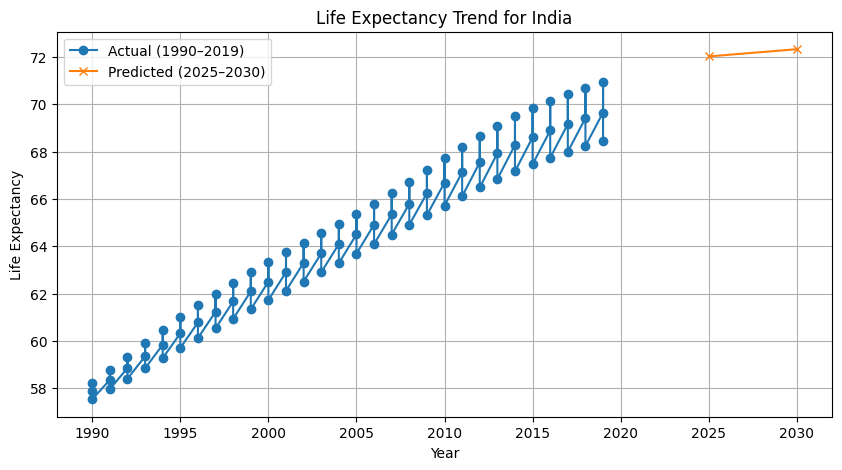

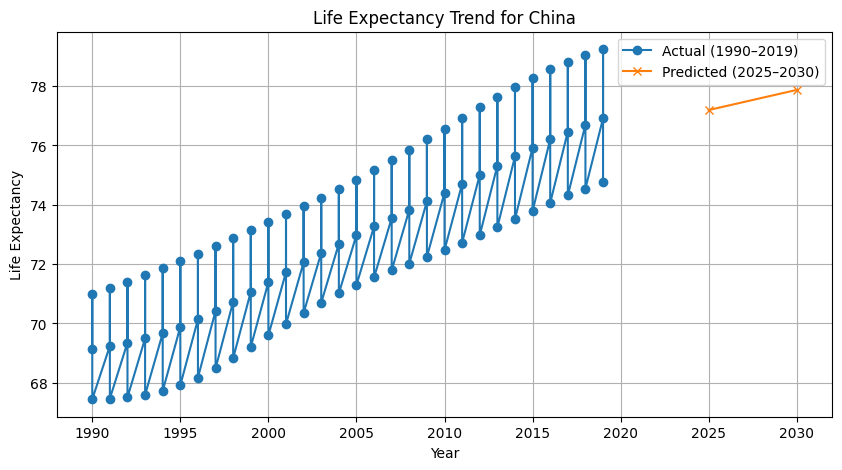

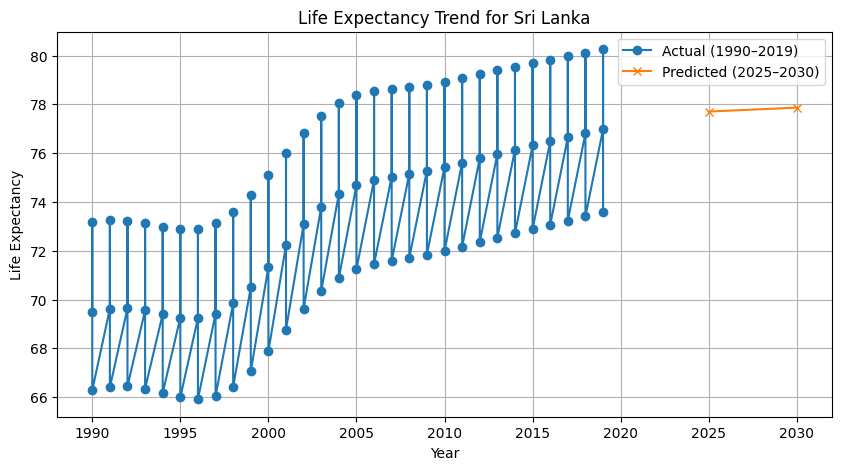

In [119]:
import matplotlib.pyplot as plt

def plot_future(country):
    df_c = df_clean[df_clean["Country"] == country]

    plt.figure(figsize=(10,5))

    # Actual values
    plt.plot(df_c["Year"], df_c["Life_Expectancy"], label="Actual (1990–2019)", marker='o')

    # Future predictions
    df_fut = final_future[final_future["Country"] == country]
    plt.plot(df_fut["Year"], df_fut["Predicted_Life_Expectancy"], 
             label="Predicted (2025–2030)", marker='x')

    plt.title(f"Life Expectancy Trend for {country}")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_future("India")
plot_future("China")
plot_future("Sri Lanka")
